# STOCK MARKET ANALYSIS

### Abdullah MEMISOGLU

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import data
from datetime import datetime


In [2]:
from __future__ import division

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [4]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end).reset_index()

In [6]:
GOOG.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-07-23,1571.869995,1507.391968,1566.969971,1515.680054,1627600,1515.680054
1,2020-07-24,1517.635986,1488.400024,1498.930054,1511.869995,1544000,1511.869995
2,2020-07-27,1540.969971,1515.209961,1515.599976,1530.199951,1246000,1530.199951
3,2020-07-28,1526.479980,1497.660034,1525.180054,1500.339966,1702200,1500.339966
4,2020-07-29,1531.251953,1501.329956,1506.319946,1522.020020,1106500,1522.020020


In [7]:
AAPL

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-07-23,97.077499,92.010002,96.997498,92.845001,197004400.0,92.223587
1,2020-07-24,92.970001,89.144997,90.987503,92.614998,185438800.0,91.995125
2,2020-07-27,94.904999,93.480003,93.709999,94.809998,121214000.0,94.175430
3,2020-07-28,94.550003,93.247498,94.367500,93.252502,103625600.0,92.628365
4,2020-07-29,95.230003,93.712502,93.750000,95.040001,90329200.0,94.403893
...,...,...,...,...,...,...,...
247,2021-07-16,149.759995,145.880005,148.460007,146.389999,93100300.0,146.389999
248,2021-07-19,144.070007,141.669998,143.750000,142.449997,121434600.0,142.449997
249,2021-07-20,147.100006,142.960007,143.460007,146.149994,96238600.0,146.149994
250,2021-07-21,146.130005,144.630005,145.529999,145.399994,74915000.0,145.399994


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,126.143899,123.047252,124.672907,124.641855,1.185792e+08,124.315169
std,10.215645,10.376962,10.317096,10.309182,5.324421e+07,10.442744
min,92.970001,89.144997,90.987503,92.614998,4.669130e+07,91.995125
25%,119.184998,116.109999,117.872498,117.334997,8.312220e+07,116.886698
50%,126.294998,123.641247,124.875000,125.035000,1.037710e+08,124.938919
75%,133.485004,130.232498,132.062496,131.945004,1.428319e+08,131.564590
max,150.000000,147.679993,149.240005,149.149994,3.743368e+08,149.149994


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   High       252 non-null    float64       
 2   Low        252 non-null    float64       
 3   Open       252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Volume     252 non-null    float64       
 6   Adj Close  252 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


<AxesSubplot:>

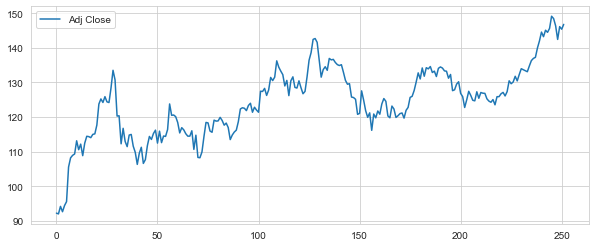

In [10]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

<AxesSubplot:>

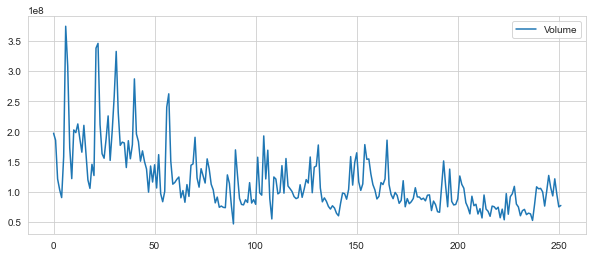

In [11]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:>

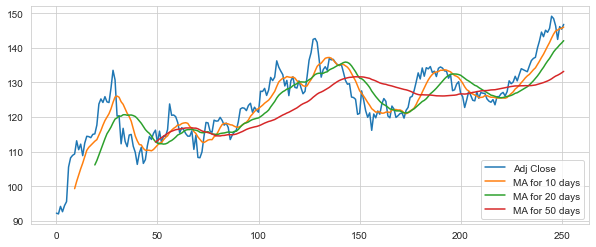

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

<AxesSubplot:>

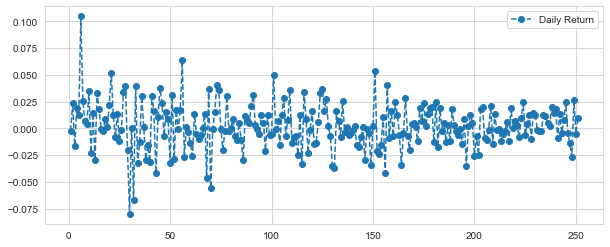

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4), legend = True,
                          linestyle = '--',marker = 'o')

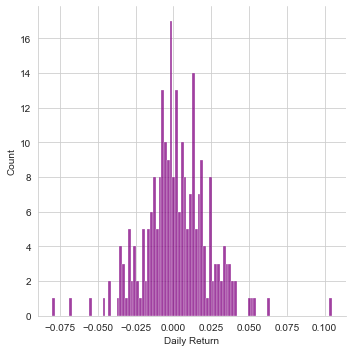

In [15]:
sns.displot(AAPL['Daily Return'].dropna(), bins = 100,
            color = 'purple')

<AxesSubplot:>

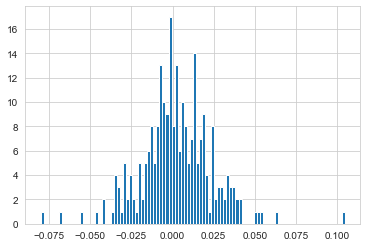

In [16]:
AAPL['Daily Return'].hist(bins = 100)

In [17]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [18]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-07-23,92.223587,1515.680054,200.597687,2986.550049
2020-07-24,91.995125,1511.869995,199.369598,3008.909912
2020-07-27,94.175430,1530.199951,201.895142,3055.209961
2020-07-28,92.628365,1500.339966,200.082703,3000.330078
2020-07-29,94.403893,1522.020020,202.103119,3033.530029


In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-07-23,NaN,NaN,NaN,NaN
2020-07-24,-0.002477,-0.002514,-0.006122,0.007487
2020-07-27,0.023700,0.012124,0.012668,0.015388
2020-07-28,-0.016427,-0.019514,-0.008977,-0.017963
2020-07-29,0.019168,0.014450,0.010098,0.011065


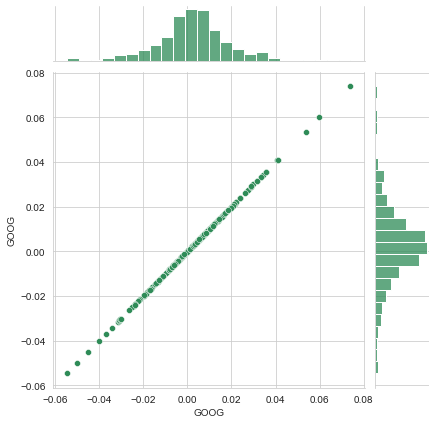

In [21]:
sns.jointplot(x = 'GOOG',y = 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

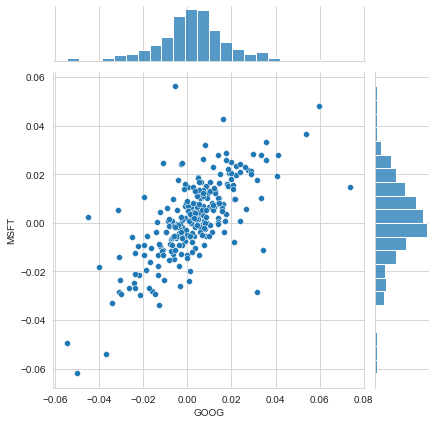

In [22]:
sns.jointplot(x = 'GOOG', y = 'MSFT', data = tech_rets, kind = 'scatter')

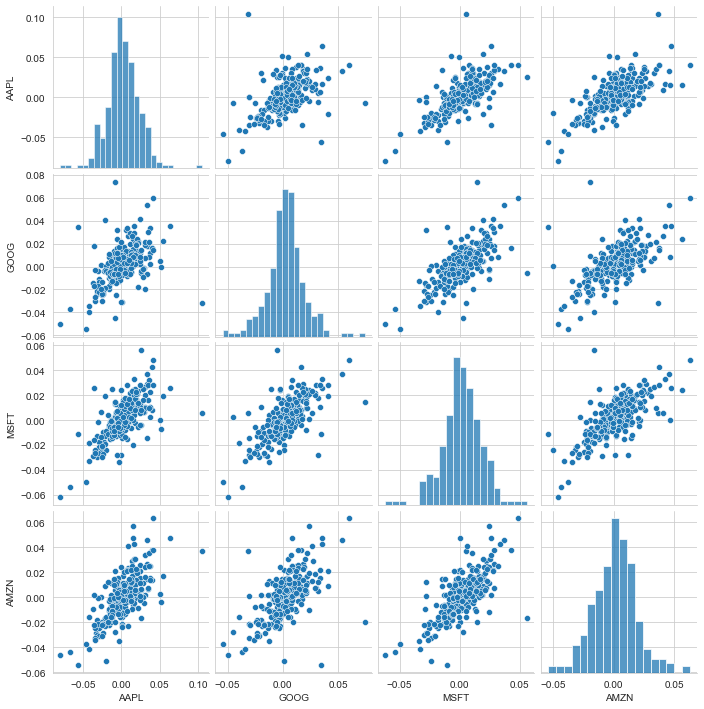

In [23]:
sns.pairplot(tech_rets.dropna())

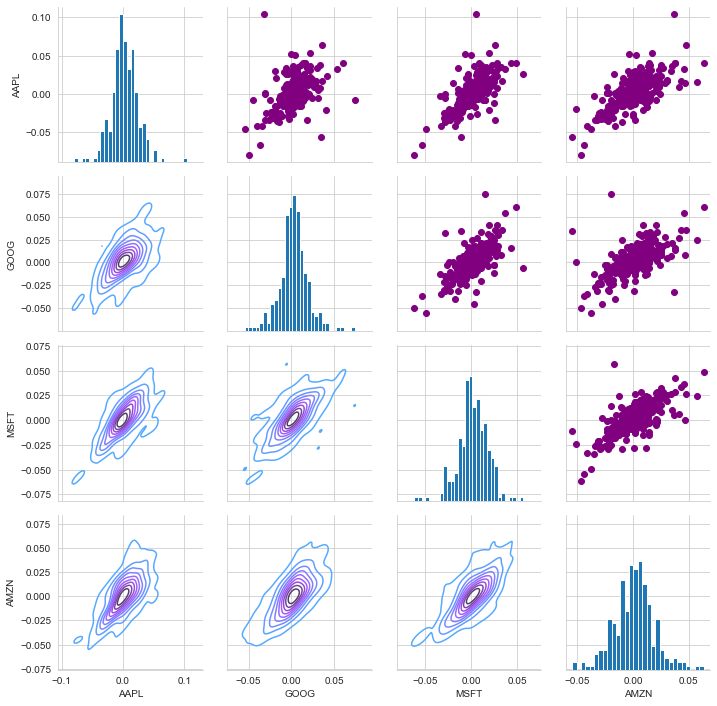

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

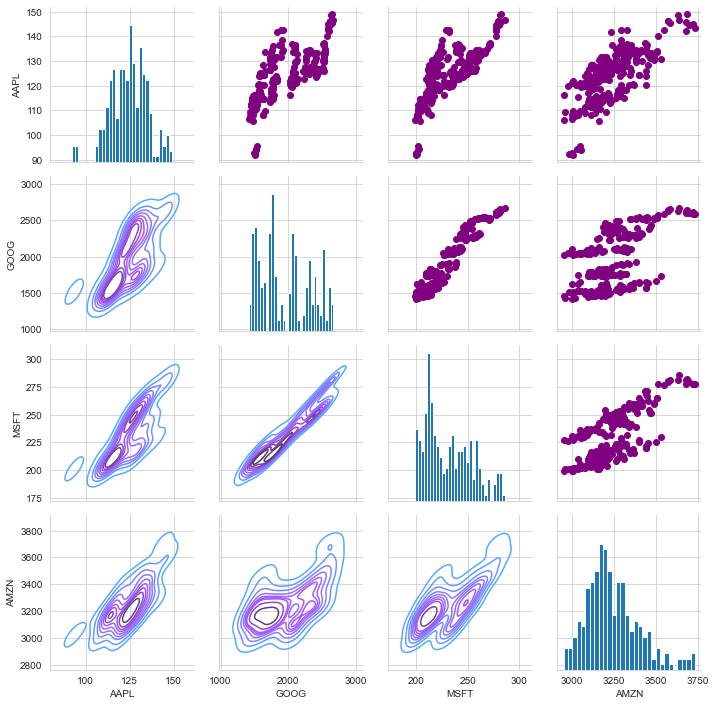

In [25]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

<AxesSubplot:>

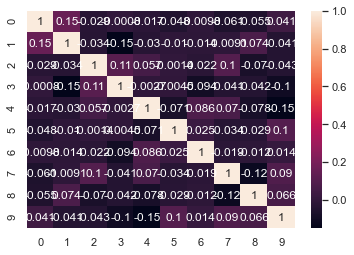

In [26]:
sns.set_theme()
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
sns.heatmap(corr,data = tech_rets.dropna(), annot = True)

<AxesSubplot:>

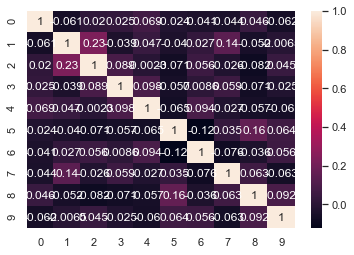

In [27]:
sns.set_theme()
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
sns.heatmap(corr,data = closing_df, annot = True)

In [28]:
rets = tech_rets.dropna()

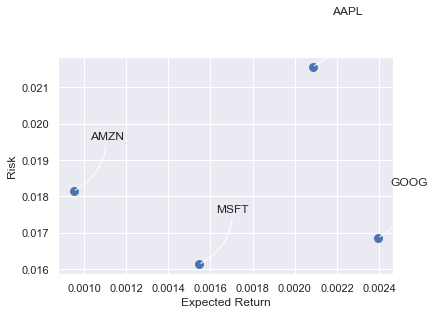

In [29]:
area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

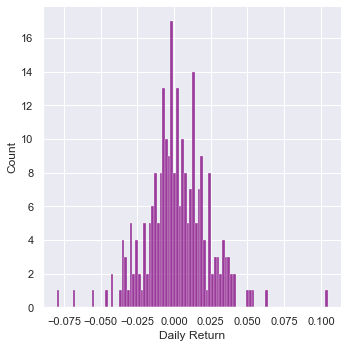

In [30]:
sns.displot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [31]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-07-24,-0.002477,-0.002514,-0.006122,0.007487
2020-07-27,0.023700,0.012124,0.012668,0.015388
2020-07-28,-0.016427,-0.019514,-0.008977,-0.017963
2020-07-29,0.019168,0.014450,0.010098,0.011065
2020-07-30,0.012100,0.006196,-0.000784,0.006049


In [32]:
rets['AAPL'].quantile(0.05)

-0.03246292442201748

In [33]:
days = 365 

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [38]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [39]:
GOOG.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-07-23,1571.869995,1507.391968,1566.969971,1515.680054,1627600,1515.680054
1,2020-07-24,1517.635986,1488.400024,1498.930054,1511.869995,1544000,1511.869995
2,2020-07-27,1540.969971,1515.209961,1515.599976,1530.199951,1246000,1530.199951
3,2020-07-28,1526.479980,1497.660034,1525.180054,1500.339966,1702200,1500.339966
4,2020-07-29,1531.251953,1501.329956,1506.319946,1522.020020,1106500,1522.020020


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

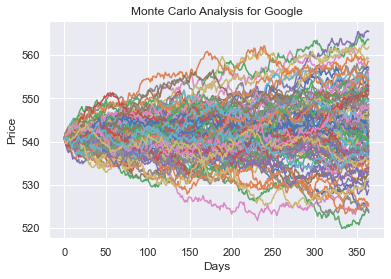

In [40]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [41]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

In [42]:
q = np.percentile(simulations, 1)

Text(0.5, 1.0, 'Final Price Distribution for Google Stock after 365 days')

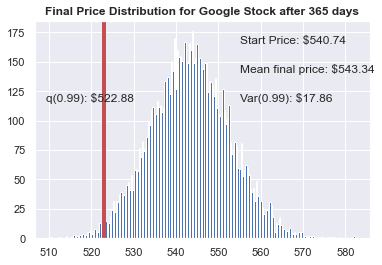

In [46]:
plt.hist(simulations, bins = 200)

plt.figtext(0.6,0.8, s = "Start Price: $%.2f" %start_price)

plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

plt.figtext(0.6,0.6, "Var(0.99): $%.2f" %(start_price - q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

plt.axvline(x = q, linewidth = 4, color = 'r')


plt.title(u"Final Price Distribution for Google Stock after %s days" %days, weight = 'bold') 